In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import TextVectorization

In [7]:
#reads a file. Each line has the format: label text
#Returns a list with the text and a list with the labels
def readData(fname):

    with open(fname, 'r', encoding="utf-8") as f:
        fileData = f.read()
  
    lines = fileData.split("\n")
    textData = list()
    textLabel = list()
    lineLength = np.zeros(len(lines))
    
    for i, aLine in enumerate(lines):     
        if not aLine:
            break  
        label = aLine.split(" ")[0]
        lineLength[i] = len(aLine.split(" "))
        if(label == "__label__1"):
            textLabel.append(0)
            textData.append(aLine.removeprefix("__label__1 "))

        elif(label == "__label__2"):
            textLabel.append(1)
            textData.append(aLine.removeprefix("__label__2 "))

        else:
            print("\nError in readData: ", i, aLine)
            exit()
    
    f.close()
    return textData, textLabel, int(np.average(lineLength)+2*np.std(lineLength))

In [8]:
# def transformData(x_train, y_train, x_test, y_test, maxFeatures, seqLength):
#     #transforms text input to int input based on the vocabulary
#     #max_tokens = maxFeatures is the size of the vocabulary
#     #output_sequence_length =  seqLength is the maximum length of the transformed text. Adds 0 is text length is shorter
#     precLayer = layers.experimental.preprocessing.TextVectorization(max_tokens = maxFeatures, 
#     standardize =  'lower_and_strip_punctuation', split = 'whitespace', output_mode = 'int', 
#     output_sequence_length =  seqLength)
#     precLayer.adapt(x_train)
#     #print(precLayer.get_vocabulary())
#     x_train_int = precLayer(x_train)
#     y_train = tf.convert_to_tensor(y_train)
#     #print(x_train_int)
#     #print(y_train)
#     x_test_int= precLayer(x_test)
#     y_test = tf.convert_to_tensor(y_test)
#     #print(x_test_int)
#     #print(y_test)

#     return x_train_int, y_train, x_test_int, y_test

# Transforming Data 
def transformData(x_train, y_train, x_test, y_test, maxFeatures, seqLength):
    precLayer = TextVectorization(
        max_tokens=maxFeatures,
        standardize='lower_and_strip_punctuation',
        split='whitespace',
        output_mode='int',
        output_sequence_length=seqLength
    )
    precLayer.adapt(x_train)

    x_train_int = precLayer(x_train)
    y_train = tf.convert_to_tensor(y_train)

    x_test_int = precLayer(x_test)
    y_test = tf.convert_to_tensor(y_test)

    return x_train_int, y_train, x_test_int, y_test, precLayer

In [10]:
# Loading data
maxFeatures = 10000
embedding_dim = 128

x_train, y_train, seqLength = readData("amazon/train_small.txt")
x_test, y_test, _ = readData("amazon/test_small.txt")

x_train_int, y_train, x_test_int, y_test, vectorizer = transformData(
    x_train, y_train, x_test, y_test, maxFeatures, seqLength
)

print("Data loaded and transformed successfully.")


Data loaded and transformed successfully.


In [11]:
from models import lstm_model, gru_model, bidirectional_lstm_model

In [12]:
model = lstm_model(maxFeatures, seqLength, embedding_dim, rnn_units=64)

history = model.fit(
    x_train_int, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

loss, accuracy = model.evaluate(x_test_int, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/5


C:\Users\Administrator\miniconda3\envs\DL\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 297ms/step - accuracy: 0.5072 - loss: 0.6934 - val_accuracy: 0.5234 - val_loss: 0.6926
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 294ms/step - accuracy: 0.5171 - loss: 0.6927 - val_accuracy: 0.5248 - val_loss: 0.6928
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 296ms/step - accuracy: 0.5196 - loss: 0.6918 - val_accuracy: 0.5258 - val_loss: 0.6923
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 46s 295ms/step - accuracy: 0.5361 - loss: 0.6875 - val_accuracy: 0.4762 - val_loss: 0.6930
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 302ms/step - accuracy: 0.5399 - loss: 0.6779 - val_accuracy: 0.5278 - val_loss: 0.6918
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5162 - loss: 0.6923
Test Accuracy: 51.82%


In [13]:
# Create and train LSTM
lstm = lstm_model(maxFeatures, seqLength, embedding_dim)
history_lstm = lstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train GRU
gru = gru_model(maxFeatures, seqLength, embedding_dim)
history_gru = gru.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train Bidirectional LSTM
bilstm = bidirectional_lstm_model(maxFeatures, seqLength, embedding_dim)
history_bilstm = bilstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 283ms/step - accuracy: 0.5175 - loss: 0.6935 - val_accuracy: 0.4758 - val_loss: 0.6936
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 281ms/step - accuracy: 0.5195 - loss: 0.6928 - val_accuracy: 0.5248 - val_loss: 0.6924
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 251ms/step - accuracy: 0.5244 - loss: 0.6904 - val_accuracy: 0.5272 - val_loss: 0.6942
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 266ms/step - accuracy: 0.5220 - loss: 0.6795 - val_accuracy: 0.4760 - val_loss: 0.7062
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 270ms/step - accuracy: 0.5280 - loss: 0.6732 - val_accuracy: 0.5282 - val_loss: 0.7028
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 275ms/step - accuracy: 0.5140 - loss: 0.6931 - val_accuracy: 0.5250 - val_loss: 0.6921
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.5212 - loss: 0.6929 - val_accuracy: 0.5246 - val_loss: 0.6920
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.5232 - loss: 0.6911 - 

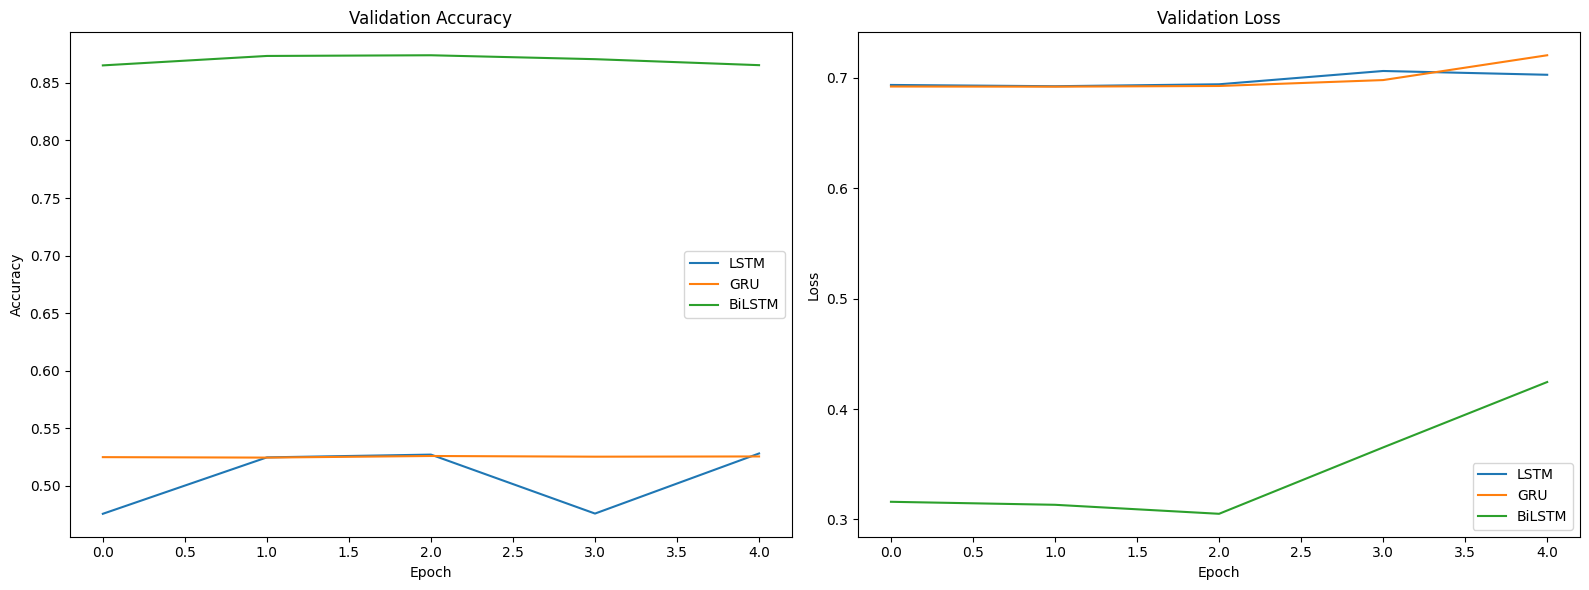

In [14]:
import matplotlib.pyplot as plt

def plot_histories(histories, labels):
    plt.figure(figsize=(16, 6))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss comparison
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_histories(
    [history_lstm, history_gru, history_bilstm],
    ['LSTM', 'GRU', 'BiLSTM']
)


In [15]:
acc_lstm = lstm.evaluate(x_test_int, y_test)[1]
acc_gru = gru.evaluate(x_test_int, y_test)[1]
acc_bilstm = bilstm.evaluate(x_test_int, y_test)[1]

print(f"LSTM Test Accuracy: {acc_lstm*100:.2f}%")
print(f"GRU Test Accuracy: {acc_gru*100:.2f}%")
print(f"BiLSTM Test Accuracy: {acc_bilstm*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.5165 - loss: 0.6999
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5162 - loss: 0.7184
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8725 - loss: 0.4121
LSTM Test Accuracy: 51.97%
GRU Test Accuracy: 51.94%
BiLSTM Test Accuracy: 86.96%
